In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://query.data.world/s/b6adganypdgbvdrk5gftvq2dmp5bk7?dws=00000')
df.drop(columns=['_seasonid',
                 'comment',
                 'stadiumid',
                 'bestof',
                 'walkover',
                 'retired',
                 'disqualified',
                 'numberofperiods',
                 'roundname_displaynumber',
                 'result_period',
                 'teams_home__doc',
                 'teams_home_mediumname',
                 'teams_away_name.1',
                 'teams_away_mediumname',
                 'teams_away_nickname',
                 'periods_ot_home',
                 'periods_ot_away',
                 'periods_ap_home',
                 'periods_ap_away'], inplace=True)
df['periods_ft_home'] = df['result_home'] - df['periods_p1_home']
df['periods_ft_away'] = df['result_away'] - df['periods_p1_away']


In [3]:
def to_df_individual(team_name):
    """
    Extrae los datos de un solo equipo en particular
    """
    team_home = df.loc[df['teams_home_abbr'] == team_name].copy()
    df.loc[df['teams_home_abbr'] == team_name, 'local'] = True
    team_away = df.loc[df['teams_away_abbr'] == team_name].copy()
    team_away['local'] = False
    df.loc[df['teams_away_abbr'] == team_name, 'local'] = False
    df_team = pd.concat([team_home, team_away], ignore_index=True)
    df_team['local'] = df_team['local'].astype('bool')
    return df_team

# Extraer los datos individuales
df_inter = to_df_individual('INT')
df_city = to_df_individual('MNC')

# Extraer los datos individuales por local y visita de cada equipo
df_inter_home = df_inter[df_inter['teams_home_abbr'] == 'INT']
df_inter_away = df_inter[df_inter['teams_away_abbr'] == 'INT']
df_city_home = df_city[df_city['teams_home_abbr'] == 'MNC']
df_city_away = df_city[df_city['teams_away_abbr'] == 'MNC']


Inter Milan promedio de goles por partido: 1.29
Manchester City promedio de goles por partido: 1.96


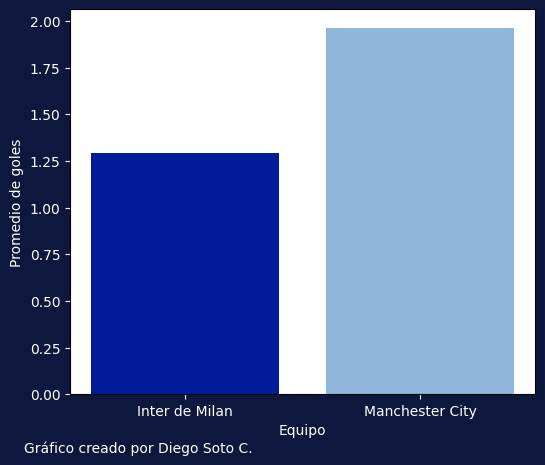

In [23]:

# calcular el promedio de goles por partido para cada equipo
df_inter_goals = pd.concat([df_inter_home['result_home'].fillna(0), df_inter_away['result_away'].fillna(0)])
df_city_goals = pd.concat([df_city_home['result_home'].fillna(0), df_city_away['result_away'].fillna(0)])

# Entrega de resultados
print('\033[1mInter Milan promedio de goles por partido:\033[0m', round(df_inter_goals.mean(), 2))
print('\033[1mManchester City promedio de goles por partido:\033[0m', round(df_city_goals.mean(), 2))

# Gráfico
fig, ax = plt.subplots(figsize=(6, 5))
fig.patch.set_facecolor('#0e173d')  # Fondo oscuro

x = ['Inter de Milan', 'Manchester City']
y = [df_inter_goals.mean(), df_city_goals.mean()]

ax.bar(x, y, color=['#011c98', '#90b7db'])
#ax.set_title('Promedio de goles realizados por partido', fontsize=12, color='white')
ax.set_xlabel('Equipo', color='white')
ax.set_ylabel('Promedio de goles', color='white')

# Cambiar el color de las etiquetas de los ejes (ticks)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.text(-0.1, -0.15, 'Gráfico creado por Diego Soto C.', ha='left', transform=ax.transAxes, color='white')

plt.savefig('assets/Promedio_goles_bar.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()

In [7]:
# Filtrar partidos jugados por el Inter de Milán en la final
df_inter_finals = df_inter[df_inter['roundname_shortname'] == 'F']

# Contar la cantidad de partidos jugados por el Inter de Milán en la final
num_inter_finals = len(df_inter_finals)

# Contar la cantidad de veces que el Inter de Milán ha ganado la Champions League
inter_home_wins = (df_inter_finals['teams_home_abbr'] == 'INT') & (df_inter_finals['result_winner'] == 'home')
inter_away_wins = (df_inter_finals['teams_away_abbr'] == 'INT') & (df_inter_finals['result_winner'] == 'away')
inter_wins = inter_home_wins | inter_away_wins
num_inter_wins = inter_wins.sum()

# Calcular el porcentaje de victorias del Inter de Milán en la Champions League
win_pct_inter = (num_inter_wins / num_inter_finals) * 100

# Imprimir los resultados
print("El Inter de Milán ha jugado un total de", num_inter_finals, "finales de la Champions League los últimos 20 años.")
print("De esas finales ha ganado en", num_inter_wins, "ocasiones.")
print("Por lo tanto, el porcentaje de victorias del Inter de Milán en finales de la Champions League es del", win_pct_inter, "%.")

print("\n")
# Filtrar partidos jugados por el Manchester City en la final
df_city_finals = df_city[df_city['roundname_shortname'] == 'F']

# Contar la cantidad de partidos jugados por el Manchester City en la final
num_city_finals = len(df_city_finals)

# Contar la cantidad de veces que el Manchester City ha ganado la Champions League
city_home_wins = (df_city_finals['teams_home_abbr'] == 'INT') & (df_city_finals['result_winner'] == 'home')
city_away_wins = (df_city_finals['teams_away_abbr'] == 'INT') & (df_city_finals['result_winner'] == 'away')
city_wins = city_home_wins | city_away_wins
num_city_wins = city_wins.sum()

# Calcular el porcentaje de victorias del Manchester City en la Champions League
win_pct_city = (num_city_wins / num_city_finals) * 100

# Imprimir los resultados
print("El Manchester City ha jugado un total de", num_city_finals, "finales de la Champions League los últimos 20 años.")
print("De esas finales ha ganado en", num_city_wins, "ocasiones.")
print("Por lo tanto, el porcentaje de victorias del Manchester City en finales de la Champions League es del", win_pct_city, "%.")

El Inter de Milán ha jugado un total de 1 finales de la Champions League los últimos 20 años.
De esas finales ha ganado en 1 ocasiones.
Por lo tanto, el porcentaje de victorias del Inter de Milán en finales de la Champions League es del 100.0 %.


El Manchester City ha jugado un total de 1 finales de la Champions League los últimos 20 años.
De esas finales ha ganado en 0 ocasiones.
Por lo tanto, el porcentaje de victorias del Manchester City en finales de la Champions League es del 0.0 %.


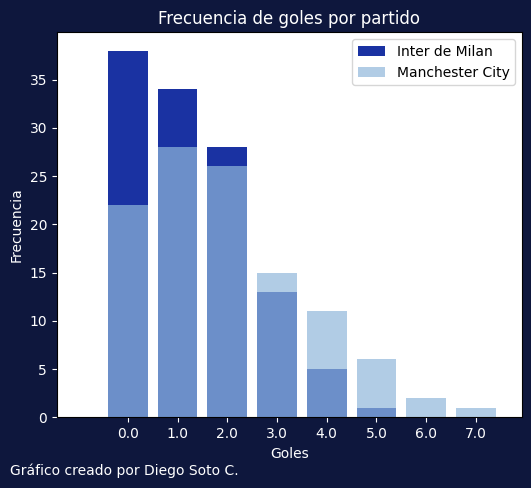

In [22]:
# Filtrar partidos jugados por el Inter de Milán y Manchester City respectivamente
df_inter_goals = pd.concat([df_inter_home['result_home'].fillna(0), df_inter_away['result_away'].fillna(0)])
df_city_goals = pd.concat([df_city_home['result_home'].fillna(0), df_city_away['result_away'].fillna(0)])

# Calcular las frecuencias
inter_freq = df_inter_goals.value_counts().sort_index()
city_freq = df_city_goals.value_counts().sort_index()

# Gráfico
fig, ax = plt.subplots(figsize=(6, 5))
fig.patch.set_facecolor('#0e173d')  # Fondo oscuro

x_inter = inter_freq.index.astype(str)
y_inter = inter_freq.values
x_city = city_freq.index.astype(str)
y_city = city_freq.values

# Dibujar un rectángulo blanco para cubrir la sección de las barras
ax.axvspan(-1, max(city_freq.index) + 0.5, facecolor='white', edgecolor='none', alpha=0.7)

ax.bar(x_inter, y_inter, alpha=0.9, label='Inter de Milan', color='#011c98')
ax.bar(x_city, y_city, alpha=0.7, label='Manchester City', color='#90b7db')


ax.set_title('Frecuencia de goles por partido', fontsize=12, color='white', x=0.5)
ax.set_xlabel('Goles', color='white')
ax.set_ylabel('Frecuencia', color='white')

# Cambiar el color de las etiquetas de los ejes (ticks)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.text(-0.1, -0.15, 'Gráfico creado por Diego Soto C.', ha='left', transform=ax.transAxes, color='white')

plt.legend()
plt.savefig('assets/Frecuencia_goles.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()


In [33]:
# Porcentaje de victorias Inter de Milán
# contar el número de victorias y derrotas de local
inter_home_wins = (df_inter['teams_home_abbr'] == 'INT') & (df_inter['result_winner'] == 'home')
inter_home_losses = (df_inter['teams_home_abbr'] == 'INT') & (df_inter['result_winner'] == 'away')
# contar el número de victorias y derrotas de visita
inter_away_wins = (df_inter['teams_away_abbr'] == 'INT') & (df_inter['result_winner'] == 'away')
inter_away_losses = (df_inter['teams_away_abbr'] == 'INT') & (df_inter['result_winner'] == 'home')
# contar el número de victorias y derrotas totales
inter_wins = inter_home_wins | inter_away_wins
inter_losses = inter_home_losses | inter_away_losses
# calcular el porcentaje de victorias de local, visita y total
inter_home_win_pct = round(inter_home_wins.sum() / (len(df_inter_home.index)) * 100, 2)
inter_away_win_pct = round(inter_away_wins.sum() / (len(df_inter_away.index)) * 100, 2)
inter_win_pct = round(inter_wins.sum() / (len(df_inter.index)) * 100, 2)
# Output
print('La cantidad de partidos ganados del Inter de Milán es de:', inter_wins.sum())
print('La cantidad de partidos perdidos del Inter de Milán es de:', inter_losses.sum())
print('Porcentaje de victorias del Inter de Milán en partidos previos como local:',inter_home_win_pct, '%')
print('Porcentaje de victorias del Inter de Milán en partidos previos como visitante:',inter_away_win_pct, '%')
print('Porcentaje de victorias del Inter de Milán en partidos previos totales:', inter_win_pct, '%')

print("\n")
# Porcentaje de victorias Manchester City
# contar el número de victorias y derrotas de local
city_home_wins = (df_city['teams_home_abbr'] == 'MNC') & (df_city['result_winner'] == 'home')
city_home_losses = (df_city['teams_home_abbr'] == 'MNC') & (df_city['result_winner'] == 'away')
# contar el número de victorias y derrotas de visita
city_away_wins = (df_city['teams_away_abbr'] == 'MNC') & (df_city['result_winner'] == 'away')
city_away_losses = (df_city['teams_away_abbr'] == 'MNC') & (df_city['result_winner'] == 'home')
# contar el número de victorias y derrotas totales
city_wins = city_home_wins | city_away_wins
city_losses = city_home_losses | city_away_losses
# calcular el porcentaje de victorias de local, visita y total
city_home_win_pct = round(city_home_wins.sum() / (len(df_city_home.index)) * 100, 2)
city_away_win_pct = round(city_away_wins.sum() / (len(df_city_away.index)) * 100, 2)
city_win_pct = round(city_wins.sum() / (len(df_city.index)) * 100, 2)
# Output
print('La cantidad de partidos ganados del Manchester City es de:', city_wins.sum())
print('La cantidad de partidos perdidos del Manchester City es de:', city_losses.sum())
print('Porcentaje de victorias del Manchester City en partidos previos como local:', city_home_win_pct, '%')
print('Porcentaje de victorias del Manchester City en partidos previos como visitante:', city_away_win_pct, '%')
print('Porcentaje de victorias del Manchester City en partidos previos:', city_win_pct, '%')


La cantidad de partidos ganados del Inter de Milán es de: 51
La cantidad de partidos perdidos del Inter de Milán es de: 36
Porcentaje de victorias del Inter de Milán en partidos previos como local: 49.15 %
Porcentaje de victorias del Inter de Milán en partidos previos como visitante: 36.67 %
Porcentaje de victorias del Inter de Milán en partidos previos totales: 42.86 %


La cantidad de partidos ganados del Manchester City es de: 60
La cantidad de partidos perdidos del Manchester City es de: 28
Porcentaje de victorias del Manchester City en partidos previos como local: 59.65 %
Porcentaje de victorias del Manchester City en partidos previos como visitante: 48.15 %
Porcentaje de victorias del Manchester City en partidos previos: 54.05 %
